<a href="https://colab.research.google.com/github/Sandesh10/Data-Challenge-2020/blob/master/Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team : DS20063


The types of behaviors more deeply explored in
Cycle 3 include:

 Sun safety and sun protection activities;

 Dietary intake and attention to calorie labels on restaurant menus;

 Alcohol consumption and the negative effects of alcohol;

 Physical activity, sedentary activity, and awareness of physical activity guidelines;

 Sleep patterns; and

 Tobacco use, e-cigarette use, and attitudes about e-cigarettes.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

In [0]:
df = pd.read_excel('data_level4.xlsx')

In [0]:
'''
    Preprocessing steps:
    1. Removing all the columns after index 359. This includes all columns after `MAILNUM` column. 
    2. Remove all the columns with object datatype. 
'''
def preprocess_df(df):
  remove_df = df.iloc[:,359:]
  df = df.drop(remove_df.columns, axis=1)
  object_cols = list(df.select_dtypes(include=['object']).columns)
  print('Removing following columns', object_cols)
  date_cols = list(df.select_dtypes(include=['datetime']).columns)
  print('Removing following columns', date_cols)
  new_df = df.drop(object_cols, axis=1)
  new_df = new_df.drop(date_cols, axis=1)
  print('Removing column : Prompt . [P.S. This contains NaN]')
  new_df = new_df.drop(['Prompt'],axis =1)
  print("New dataframe shape ", new_df.shape)
  return new_df

In [0]:
new_df = preprocess_df(df)

Removing following columns ['PersonID', 'Stratum', 'APP_REGION', 'VAR_STRATUM', 'StrongNeedHealthInfo_OS', 'HealthIns_Other_OS', 'Caregiving_Other_OS', 'CaOther_OS', 'SexualOrientation_OS']
Removing following columns ['UpdateDate']
Removing column : Prompt . [P.S. This contains NaN]
New dataframe shape  (5438, 348)


In [0]:
def create_bar_plot(df,col_ls_1,col_ls_2, figsize = (15,7)):
  temp = df[col_ls_2]
  temp.groupby(col_ls_1).count().plot(kind='bar', figsize = figsize)

def analyse_data(df,col_1, col_2, col_3):
  #removing the rows with missing data
  temp_df = df[df[col_1]>0]
  print("Shape after Filtering ",col_1," : ",temp_df.shape)

  #removing the rows with missing data
  temp_df_2 = temp_df[temp_df[col_2]>0]
  print("Shape after Filtering ",col_2," : ",temp_df_2.shape)
  res = temp_df_2.groupby([col_1,col_2]).count()
  print(res)
  create_bar_plot(temp_df_2, [col_1,col_2], [col_1,col_2, col_3])
  print('Done!!')


How does feeling depressed or anxious (F11) relate to people’s health-related
information seeking [see RQ 1 above for suggestions of relevant survey questions]? For
example, do people who feel depressed or anxious report encountering more barriers
during their search for health information?

Shape after Filtering  LittleInterest  :  (5318, 348)
Shape after Filtering  SeekHealthInfo  :  (5231, 348)
                               HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
LittleInterest SeekHealthInfo                    ...                         
1              1                220         220  ...             220      220
               2                 76          76  ...              76       76
2              1                263         263  ...             263      263
               2                 88          88  ...              88       88
3              1                931         931  ...             931      931
               2                153         153  ...             153      153
4              1               2810        2810  ...            2810     2810
               2                690         690  ...             690      690

[8 rows x 346 columns]
Done!!


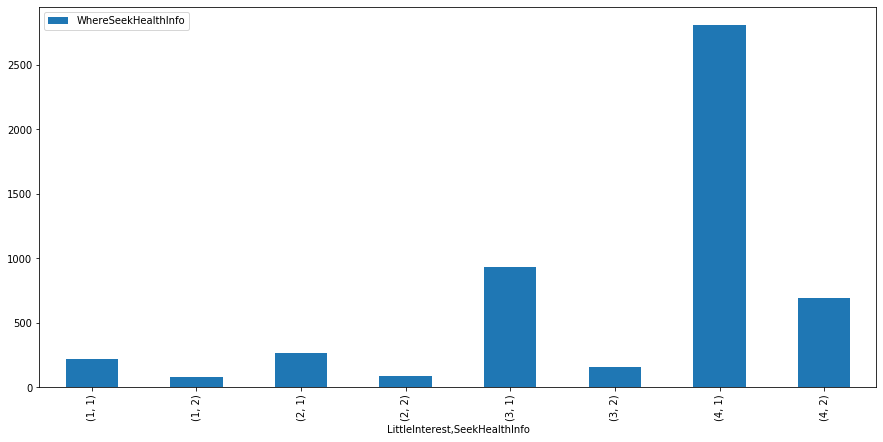

In [0]:
'''
  LittleInterest

  F11a. Over the past 2 weeks, how often have you been bothered by: Little interest or pleasure in doing things?

    1. Nearly every day         2. More than half the days
    3. Several days             4. Not at all

  SeekHealthInfo

  A1. Have you ever looked for information about health or medical topics from any source?
      1.  Yes       2. No
'''

analyse_data(new_df,'LittleInterest','SeekHealthInfo','WhereSeekHealthInfo')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(5309, 348)
                        HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Nervous SeekHealthInfo                    ...                         
1       1                446         446  ...             446      446
        2                121         121  ...             121      121
2       1               1147        1147  ...            1147     1147
        2                166         166  ...             166      166
3       1               2624        2624  ...            2624     2624
        2                719         719  ...             719      719

[6 rows x 346 columns]


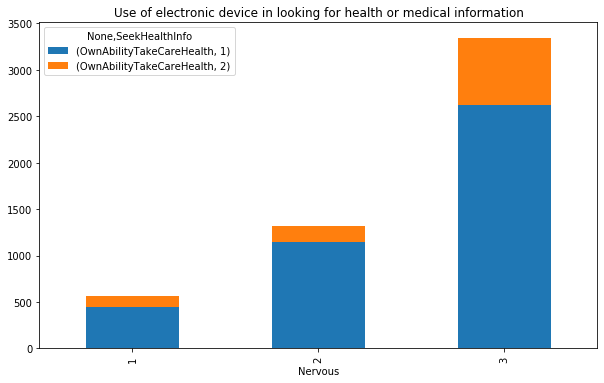

In [0]:
new_df2 = new_df[new_df['Nervous']>0]
new_df2['Nervous'] = new_df2['Nervous'].apply(lambda x: 1 if x<=2 else (x-1))
print(new_df2.shape)
new_df3 = new_df2[new_df2['SeekHealthInfo']>0]
# new_df3['AvoidDoc'] = new_df3['AvoidDoc'].apply(lambda x: 1 if x<=2 else (2 if x>2 and x<=4 else 3))
print(new_df3.groupby(['Nervous','SeekHealthInfo']).count())
temp = new_df3[['Nervous','SeekHealthInfo','OwnAbilityTakeCareHealth']]
temp.groupby(['Nervous','SeekHealthInfo']).count().unstack(level=1).plot.bar(stacked=True,
              title='Use of electronic device in looking for health or medical information',figsize = (10,6))

Shape after Filtering  Hopeless  :  (5305, 348)
Shape after Filtering  SeekHealthInfo  :  (5218, 348)
                         HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Hopeless SeekHealthInfo                    ...                         
1        1                157         157  ...             157      157
         2                 57          57  ...              57       57
2        1                228         228  ...             228      228
         2                 57          57  ...              57       57
3        1                845         845  ...             845      845
         2                146         146  ...             146      146
4        1               2985        2985  ...            2985     2985
         2                743         743  ...             743      743

[8 rows x 346 columns]
Done!!


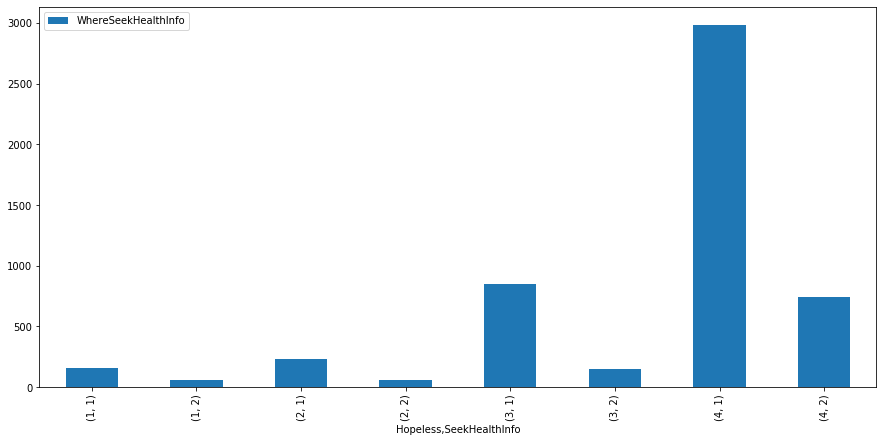

In [0]:
'''
  Hopeless

  F11b. Over the past 2 weeks, how often have you been bothered by: Feeling down, depressed or hopeless?

    1. Nearly every day         2. More than half the days
    3. Several days             4. Not at all

  SeekHealthInfo

  A1. Have you ever looked for information about health or medical topics from any source?
      1.  Yes       2. No
'''

analyse_data(new_df,'Hopeless','SeekHealthInfo','WhereSeekHealthInfo')

Shape after Filtering  Nervous  :  (5309, 348)
Shape after Filtering  SeekHealthInfo  :  (5223, 348)
                        HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Nervous SeekHealthInfo                    ...                         
1       1                175         175  ...             175      175
        2                 62          62  ...              62       62
2       1                271         271  ...             271      271
        2                 59          59  ...              59       59
3       1               1147        1147  ...            1147     1147
        2                166         166  ...             166      166
4       1               2624        2624  ...            2624     2624
        2                719         719  ...             719      719

[8 rows x 346 columns]
Done!!


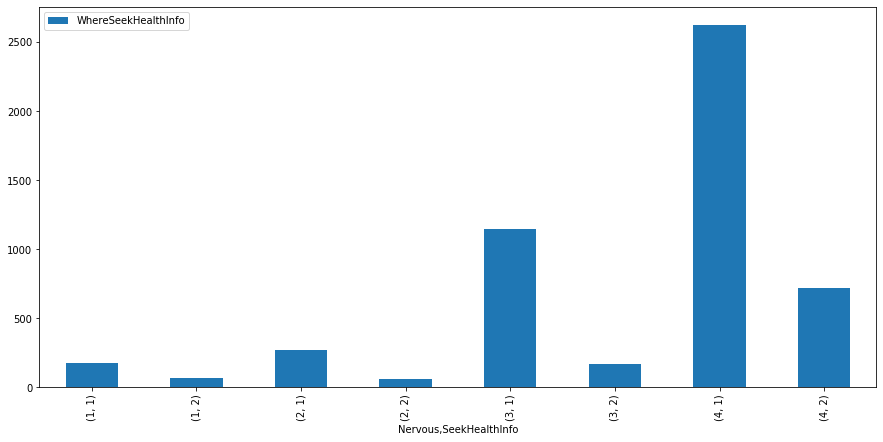

In [0]:
'''
  Nervous

  F11c. Over the past 2 weeks, how often have you been bothered by: Feeling nervous, anxious or on edge?

    1. Nearly every day         2. More than half the days
    3. Several days             4. Not at all

  SeekHealthInfo

  A1. Have you ever looked for information about health or medical topics from any source?
      1.  Yes       2. No
'''

analyse_data(new_df,'Nervous','SeekHealthInfo','WhereSeekHealthInfo')

Shape after Filtering  Worrying  :  (5300, 348)
Shape after Filtering  SeekHealthInfo  :  (5213, 348)
                         HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Worrying SeekHealthInfo                    ...                         
1        1                185         185  ...             185      185
         2                 62          62  ...              62       62
2        1                226         226  ...             226      226
         2                 59          59  ...              59       59
3        1                834         834  ...             834      834
         2                157         157  ...             157      157
4        1               2964        2964  ...            2964     2964
         2                726         726  ...             726      726

[8 rows x 346 columns]
Done!!


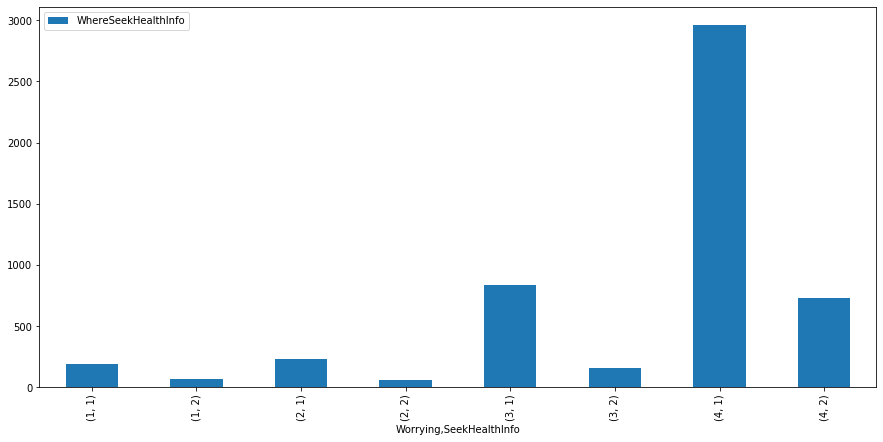

In [0]:
'''
  Worrying

  F11d. Over the past 2 weeks, how often have you been bothered by: Not being able to stop or control worrying?

    1. Nearly every day         2. More than half the days
    3. Several days             4. Not at all

  SeekHealthInfo

  A1. Have you ever looked for information about health or medical topics from any source?
      1.  Yes       2. No
'''

analyse_data(new_df,'Worrying','SeekHealthInfo','WhereSeekHealthInfo')

# Earlier Work

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 730 entries, HHID to IncomeRanges_IMP
dtypes: datetime64[ns](1), float64(358), int64(362), object(9)
memory usage: 30.3+ MB


Removing all `TG_all_` columns

In [0]:
remove_df = df.iloc[:,359:]
df = df.drop(remove_df.columns, axis=1)
df.shape

(5438, 359)

**Preprocessing upto here**: Removed columns of type object and datetime.

In [0]:
object_cols = list(df.select_dtypes(include=['object']).columns)
object_cols

['PersonID',
 'Stratum',
 'APP_REGION',
 'VAR_STRATUM',
 'StrongNeedHealthInfo_OS',
 'HealthIns_Other_OS',
 'Caregiving_Other_OS',
 'CaOther_OS',
 'SexualOrientation_OS']

In [0]:
date_cols = list(df.select_dtypes(include=['datetime']).columns)
date_cols

['UpdateDate']

In [0]:
new_df = df.drop(object_cols, axis=1)
new_df = new_df.drop(date_cols, axis=1)
len(new_df.columns)


349

Prompt column seems to have NaN values

In [0]:
new_df.columns[new_df.isna().any()].tolist()

['Prompt']

In [0]:
new_df = new_df.drop(['Prompt'],axis =1)
len(new_df.columns), new_df.shape

(348, (5438, 348))

In [0]:
'''
ConfidentGetHealthInf
  1.Completely confident     2.Very confident
  3.Somewhat confident       4.A little confident
  5.Not confident at all
'''
genh_df = new_df[new_df['ConfidentGetHealthInf']>0]
print(genh_df.shape) #(5337, 348)

#filtering out sexualorientation on generalhealth filtered data
genh_s_df = genh_df[genh_df['IntRsn_SharedSocNet']>0]
print(genh_s_df.shape)  #(5003, 348)
genh_s_df.groupby(['ConfidentGetHealthInf','IntRsn_SharedSocNet']).count()


(5308, 348)
(5220, 348)


HHID  ...  MAILNUM
ConfidentGetHealthInf IntRsn_SharedSocNet        ...         
1                     1                     190  ...      190
                      2                    1175  ...     1175
2                     1                     229  ...      229
                      2                    1737  ...     1737
3                     1                     182  ...      182
                      2                    1330  ...     1330
4                     1                      17  ...       17
                      2                     238  ...      238
5                     1                       8  ...        8
                      2                     114  ...      114

[10 rows x 346 columns]

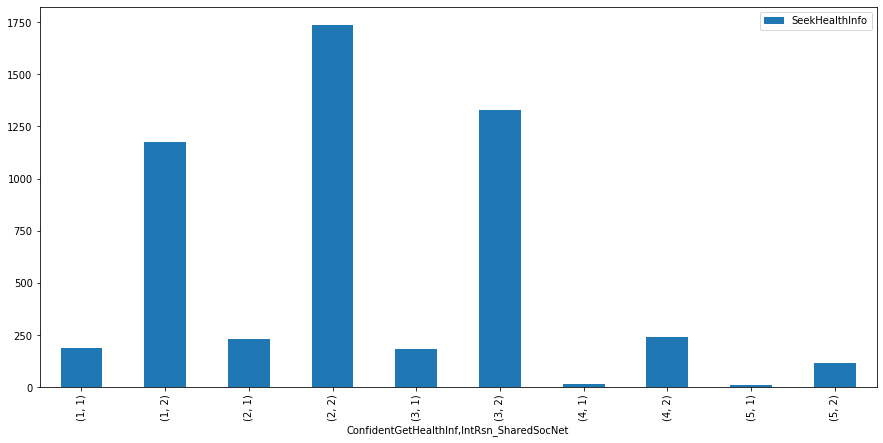

In [0]:
temp = genh_s_df[['ConfidentGetHealthInf','SeekHealthInfo','IntRsn_SharedSocNet']]
temp.groupby(['ConfidentGetHealthInf','IntRsn_SharedSocNet']).count().plot(kind='bar', figsize = (15,7))

In [0]:

q3 = new_df[['LittleInterest','Hopeless','Nervous','Worrying']]
q3_df = new_df[(new_df['ConfidentGetHealthInf']>0) & (new_df['Hopeless']>0) &
                 (new_df['Nervous']>0) & (new_df['Worrying']>0)]
print(q3_df.shape)

(5145, 348)


(4045, 348)
                           HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
LittleInterest Frustrated                    ...                         
1              1             49          49  ...              49       49
               2             50          50  ...              50       50
               3             36          36  ...              36       36
               4             70          70  ...              70       70
2              1             41          41  ...              41       41
               2             80          80  ...              80       80
               3             62          62  ...              62       62
               4             71          71  ...              71       71
3              1             84          84  ...              84       84
               2            269         269  ...             269      269
               3            231         231  ...             231      231
               4          

'\n      LittleInterest    Frustrated\n          1                 1,2     99\n                            3,4     106\n          2                 1,2     121\n                            3,4     133\n          3                 1,2     353\n                            3,4     545\n          4                 1,2     763\n                            3,4     1925\n\n          573 (42.22% of the people who had felt Little Interest felt frustrating)\n              (28.38% of the people who never felt Little Interest felt frustrating)\n\n'

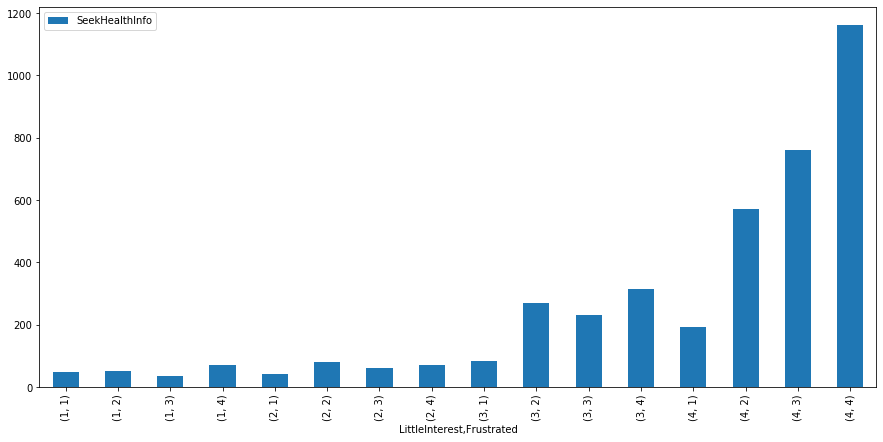

In [0]:
'''

LittleInterest
    1.Nearly every day      2.More than half the days
    3.Several days          4. Not at all

Frustrated
    1.Strongly agree        2.Somewhat agree
    3.Somewhat disagree     4.Strongly disagree
'''

temp_df = new_df[(new_df['LittleInterest']>0) & (new_df['Frustrated']>0)]
print(temp_df.shape)
print(temp_df.groupby(['LittleInterest','Frustrated']).count())
temp = temp_df[['LittleInterest','SeekHealthInfo','Frustrated']]
temp.groupby(['LittleInterest','Frustrated']).count().plot(kind='bar', figsize = (15,7))


'''
      LittleInterest    Frustrated
          1                 1,2     99
                            3,4     106
          2                 1,2     121
                            3,4     133
          3                 1,2     353
                            3,4     545
          4                 1,2     763
                            3,4     1925

          573 (42.22% of the people who had felt Little Interest felt frustrating)
              (28.38% of the people who never felt Little Interest felt frustrating)

'''

(4039, 348)
                     HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Hopeless Frustrated                    ...                         
1        1             40          40  ...              40       40
         2             36          36  ...              36       36
         3             30          30  ...              30       30
         4             44          44  ...              44       44
2        1             45          45  ...              45       45
         2             63          63  ...              63       63
         3             45          45  ...              45       45
         4             66          66  ...              66       66
3        1             83          83  ...              83       83
         2            239         239  ...             239      239
         3            219         219  ...             219      219
         4            275         275  ...             275      275
4        1            198         19

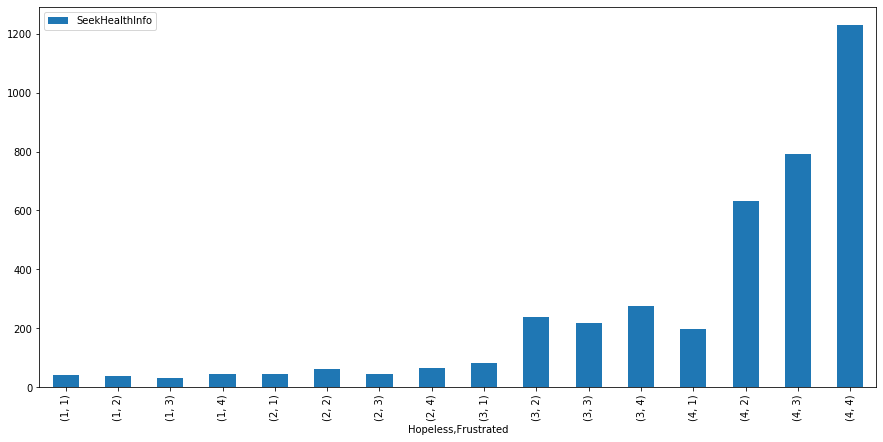

In [0]:
temp_df = new_df[(new_df['Hopeless']>0) & (new_df['Frustrated']>0)]
print(temp_df.shape)
print(temp_df.groupby(['Hopeless','Frustrated']).count())
temp = temp_df[['Hopeless','SeekHealthInfo','Frustrated']]
temp.groupby(['Hopeless','Frustrated']).count().plot(kind='bar', figsize = (15,7))

(4039, 348)
                    HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Nervous Frustrated                    ...                         
1       1             38          38  ...              38       38
        2             40          40  ...              40       40
        3             37          37  ...              37       37
        4             52          52  ...              52       52
2       1             51          51  ...              51       51
        2             89          89  ...              89       89
        3             49          49  ...              49       49
        4             74          74  ...              74       74
3       1             97          97  ...              97       97
        2            313         313  ...             313      313
        3            310         310  ...             310      310
        4            387         387  ...             387      387
4       1            181         181  ...         

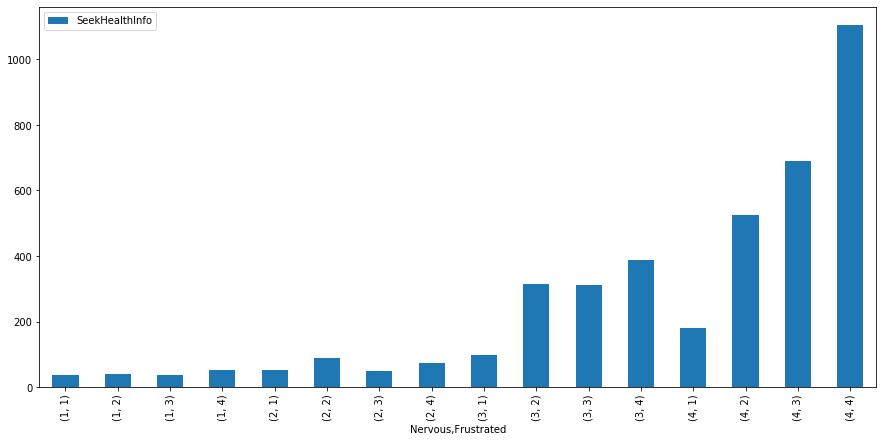

In [0]:
temp_df = new_df[(new_df['Nervous']>0) & (new_df['Frustrated']>0)]
print(temp_df.shape)
print(temp_df.groupby(['Nervous','Frustrated']).count())
temp = temp_df[['Nervous','SeekHealthInfo','Frustrated']]
temp.groupby(['Nervous','Frustrated']).count().plot(kind='bar', figsize = (15,7))

(4033, 348)
                     HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
Worrying Frustrated                    ...                         
1        1             47          47  ...              47       47
         2             43          43  ...              43       43
         3             33          33  ...              33       33
         4             52          52  ...              52       52
2        1             43          43  ...              43       43
         2             76          76  ...              76       76
         3             49          49  ...              49       49
         4             51          51  ...              51       51
3        1             81          81  ...              81       81
         2            250         250  ...             250      250
         3            216         216  ...             216      216
         4            260         260  ...             260      260
4        1            194         19

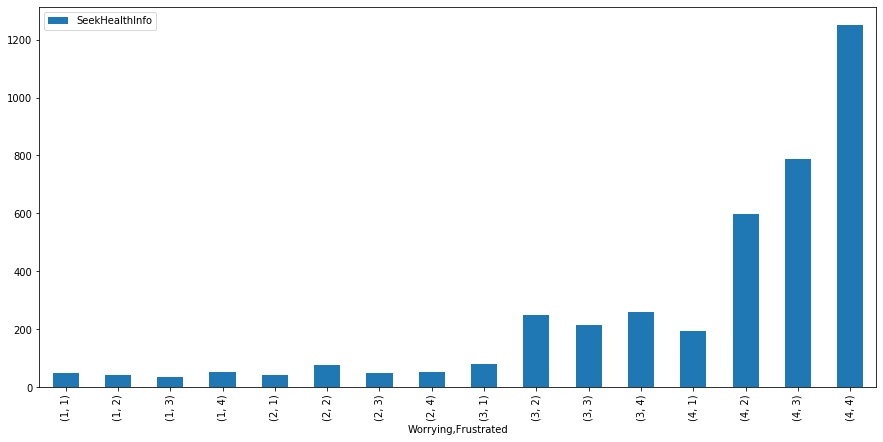

In [0]:
temp_df = new_df[(new_df['Worrying']>0) & (new_df['Frustrated']>0)]
print(temp_df.shape)
print(temp_df.groupby(['Worrying','Frustrated']).count())
temp = temp_df[['Worrying','SeekHealthInfo','Frustrated']]
temp.groupby(['Worrying','Frustrated']).count().plot(kind='bar', figsize = (15,7))